Проверка гипотезы о распределении номинативной переменной.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math

Обе переменные номинативные.

Расстояние Пирсона.

Распределение Хи квадрат с k степенями свободы - это распределение суммы квадратов
k независимых стандартных нормальных случайных величин. 

При достаточно большом количестве степеней свободы, распределение Хи квадрат будет
стремиться к нормальному, т.к. сумма большого количества величин близких к нулю - это что то уже менее близкое к нулю.

Требования:

- Независимость наблюдений.
- Минимальное количество наблюдений в каждой ячейке больше 5.

In [5]:
# Мы 60 раз бросили монетку
trys = np.array([i for i in range(60)])
# Получили 20 выпадений орла и 40 выпадений решки
sides = np.array(["Орел" for i in range(20)] + ["Решка" for i in range(40)])

data = {"trys": trys, "sides": sides}
df = pd.DataFrame(data).groupby("sides").count().reset_index()


Сформируем нулевую гипотезу.

Н0: Вероятность выпадения орла = 0.5

Н1: Вероятность выпадения орла != 0.5

In [6]:
# Cначала найдем ожидаемые значения
df["expected"] = np.array([int(np.mean(df.trys)) for i in range(len(df))])

# Затем поймем, насколько сильно наблюдаемые значения отклонились от ожидаемых
df["difference"] = df.expected - df.trys

Мы не можем просто посчитать квадраты отклонений от ожидаемых значений в каждой
ячейке, т.к. они могут быть либо очень значимыми при малом количестве наблюдений
в выборке, либо абсолютно незначимыми, если наблюдений в выборке много. 

Поэтому нам необходимо учесть количество наблюдений в выборке. Для этого Пирсон 
предложил делить эти оклонения на корень из ожидаемой частоты.

Пирсон математически доказал, что при условии справедливости нулевой гипотезы
распеределение наблюдаемого значения вокруг ожидаемого пропорционально корню из ожидаемой частоты.

In [7]:
def hi_squared(current, expected):
    return sum((current - expected) ** 2 / expected)

# Сложим отклонения поправленные на корень из ожидаемой частоты в квадрате
hi_sq = sum((df.difference / df.expected ** 0.5) ** 2)
# Или второй вариант записи
hi_sq = sum(df.difference ** 2 / df.expected)

hi_sq = hi_squared(df.trys, 30)
"""
Это и будет расстояние Хи квадрат пирсона.
Это число покажет насколько сильно наблюдаемые частоты признака отклоняются
от ожидаемых частот признакак
"""
print(end="")
print("Мой Хи квадрат:", hi_sq)

# реализованный в Питоне метод для расчета уровня значимости Хи квадрат
print(stats.chisquare(f_obs=df.trys, f_exp=df.expected))
# Как мы видим p_value позволяет нам отклонить нулевую гипотезу
print("Еще один вариант расчета:", 1 - stats.chi2.cdf(hi_sq , 1))


Мой Хи квадрат: 6.666666666666667
Power_divergenceResult(statistic=6.666666666666667, pvalue=0.009823274507519235)
Еще один вариант расчета: 0.009823274507519186


Если мы будем расчитывать Хи квадрат для двух независимых переменных x и y.

CKO_x = 1

MU_x = 0

CKO_y = 1

MU_y = 0

Мы получим распределение Хи квадрат с 2-мя степенями свободы. Хи квадрат в этом случае будет равен сумме квадратов отклонений этих 2-х переменных от 0. Это будет
расстояние от точки с координатами (0, 0) в квадрате, или просто квадрат гипотенузы.
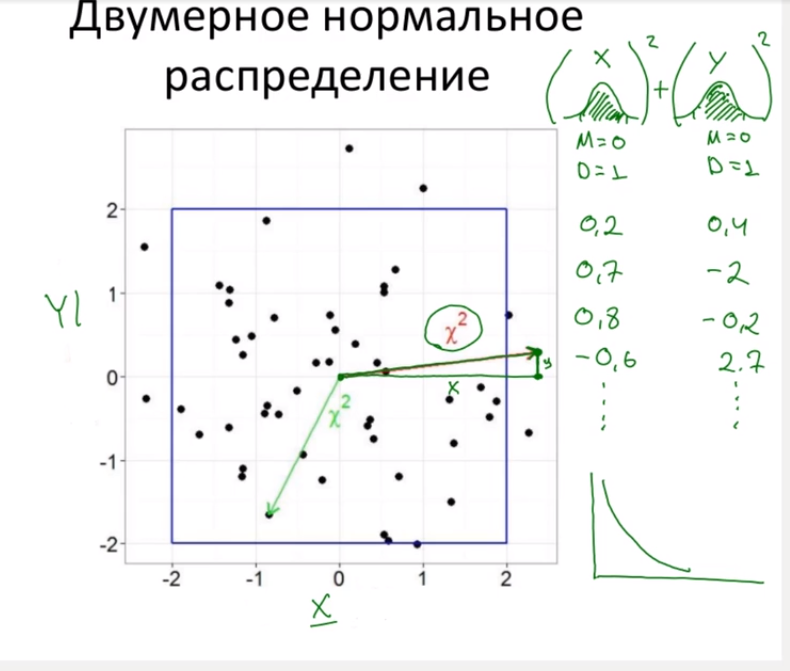

Однако, в нашем случае число степеней свободы будет равно N - 1, где N - число слагаемых. Т.к. если мы знаем N - 1 слагаемое, то мы точно знаем и последнее слагаемое.

In [8]:
def plot_dencity(data):
    sns.set(rc={'figure.figsize':(8, 8)})
    sns.kdeplot(data)
    
    
def hi_squared(current, expected):
    return sum((current - expected) ** 2 / expected)

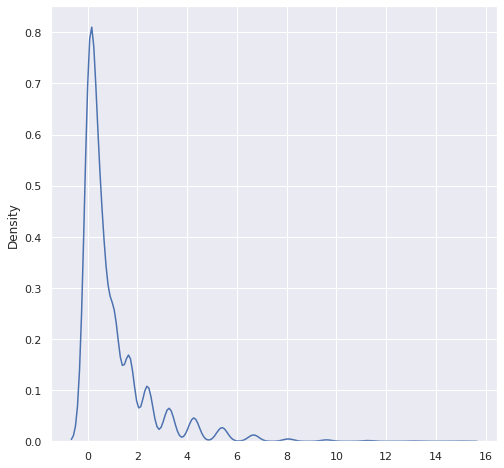

In [9]:
# Повторим эксперимент, делая выборки из генеральной совокупности, много раз, при условии,
# что верна нулевая гипотеза
# Получим распределение Хи квадрат

general = np.array([1 for i in range(500)] + [0 for i in range(500)])
sample_len = 60
expected = sample_len / len(set(general))
hi_sq_list = [None for i in range(10000)]
for i in range(10000):
    sample = np.random.choice(general, sample_len)
    data = {"sample": sample, "trys": [i for i in range(len(sample))]}
    df = pd.DataFrame(data).groupby("sample").count()
    hi_sq_list[i] = hi_squared(df.trys, expected)
    
plot_dencity(hi_sq_list)

In [10]:
# у нас есть выборка из 90 избирателей, которые выбирают между тремя партиями
votes = np.array([i for i in range(90)])
# есть данные о том, какой избиратель, за какую партию голосовал
parties = np.array(
    ["A" for i in range(10)] + ["B" for i in range(30)] + ["C" for i in range(50)]
)

data = {"voter": votes, "party": parties}
df = pd.DataFrame(data).groupby("party").count().reset_index()

<AxesSubplot:xlabel='party', ylabel='voter'>

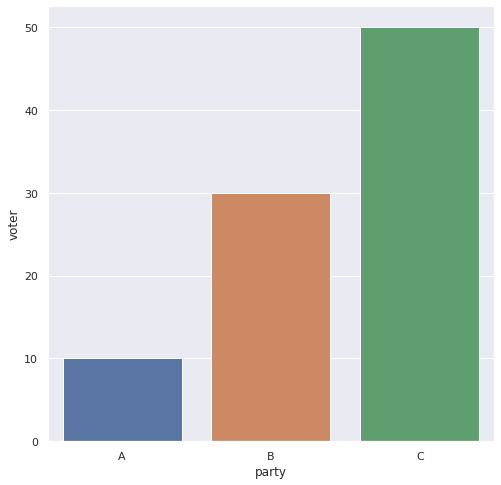

In [11]:
sns.barplot (x="party", y="voter", data=df, ci = None)

В данной задаче нам надо проверить, что наше эмпирическое (то, которое у нас есть) распределение частот значимо отличается от теоритического.

H0: В генеральной совокупности все 3 партии встречаются равное количество раз.

Н1: У нас есть значимые отличия в голосах за каждую партию.

In [12]:
df["expected"] = int(sum(df.voter) / len(df))
chi_sq = sum((df.voter - df.expected) ** 2 / df.expected)
print(1 - stats.chi2.cdf(chi_sq , len(df)-1))
# Как мы видим отличия значимые, нулевую гипотезу можно отклонить

1.619596792346023e-06
